In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(os.path.join("..", "data", "btcusd.csv"))

In [3]:
df.head(10)

,time,open,close,high,low,volume
0,1364774820000,93.25000,93.30000,93.30000,93.25000,93.300000
1,1364774880000,100.00000,100.00000,100.00000,100.00000,93.300000
2,1364774940000,93.30000,93.30000,93.30000,93.30000,33.676862
3,1364775060000,93.35000,93.47000,93.47000,93.35000,20.000000
4,1364775120000,93.47000,93.47000,93.47000,93.47000,2.021627
5,1364775180000,93.03001,93.03000,93.03001,93.03000,4.985400
6,1364775960000,93.04399,93.04399,93.04399,93.04399,12.689501
7,1364776080000,93.34999,93.35000,93.35000,93.34999,5.000000
8,1364776500000,93.19999,93.35000,93.35000,93.19999,40.000000
9,1364777580000,93.25000,93.30000,93.30000,93.25000,18.300000


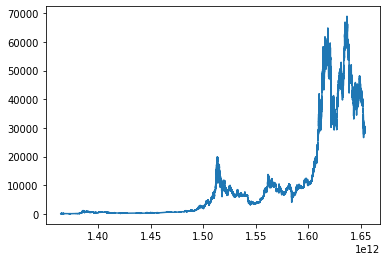

In [4]:
plt.plot(df["time"], df["open"])

In [5]:
print(df.describe())

               time          open         close          high           low  \
count  3.882704e+06  3.882704e+06  3.882704e+06  3.882704e+06  3.882704e+06   
mean   1.529366e+12  1.267307e+04  1.267309e+04  1.267953e+04  1.266662e+04   
std    7.771763e+10  1.677927e+04  1.677932e+04  1.678778e+04  1.677080e+04   
min    1.364775e+12  1.000000e-02  1.060000e+00  1.060000e+00  1.000000e-02   
25%    1.469943e+12  7.125001e+02  7.125000e+02  7.129700e+02  7.121700e+02   
50%    1.535520e+12  6.644400e+03  6.644300e+03  6.646100e+03  6.642246e+03   
75%    1.595017e+12  1.147609e+04  1.147601e+04  1.148100e+04  1.147100e+04   
max    1.653816e+12  6.892500e+04  6.892500e+04  6.895800e+04  6.873400e+04   

             volume  
count  3.882704e+06  
mean   1.559778e+01  
std    5.509120e+01  
min    1.000000e-08  
25%    5.000000e-01  
50%    2.563862e+00  
75%    1.112644e+01  
max    7.228079e+03  


In [6]:
df.tail(10)

,time,open,close,high,low,volume
3882694,1653815760000,29046.000000,29046.766892,29046.766892,29046.000000,0.000835
3882695,1653815820000,29046.766892,29046.000000,29046.766892,29046.000000,0.001338
3882696,1653815880000,29046.000000,29025.000000,29046.766892,29025.000000,1.010766
3882697,1653815940000,29024.199883,28984.278131,29024.199883,28980.000000,3.534714
3882698,1653816000000,28985.000000,28988.572257,28990.116373,28979.984004,5.260777
3882699,1653816060000,28988.000000,28984.000000,28988.000000,28969.000000,3.104842
3882700,1653816120000,28984.000000,28969.000000,28985.000000,28969.000000,0.705913
3882701,1653816180000,28970.000000,28978.000000,28978.000000,28970.000000,0.743593
3882702,1653816240000,28969.000000,28979.000000,28981.000000,28969.000000,0.242249
3882703,1653816300000,28976.000000,28980.674620,28980.674620,28976.000000,0.259808


In [7]:
print(df.dtypes)

time        int64
open      float64
close     float64
high      float64
low       float64
volume    float64
dtype: object


In [8]:
# Convert timestamp to datetime
date_time = pd.to_datetime(df.time, dayfirst=True, unit='ms')

In [9]:
print(date_time)

0         2013-04-01 00:07:00
1         2013-04-01 00:08:00
2         2013-04-01 00:09:00
3         2013-04-01 00:11:00
4         2013-04-01 00:12:00
                  ...        
3882699   2022-05-29 09:21:00
3882700   2022-05-29 09:22:00
3882701   2022-05-29 09:23:00
3882702   2022-05-29 09:24:00
3882703   2022-05-29 09:25:00
Name: time, Length: 3882704, dtype: datetime64[ns]


In [10]:
# Convert datetime to local datetime
date_time_local = date_time.dt.tz_localize('utc').dt.tz_convert("Europe/London")

In [11]:
date_time_local

0         2013-04-01 01:07:00+01:00
1         2013-04-01 01:08:00+01:00
2         2013-04-01 01:09:00+01:00
3         2013-04-01 01:11:00+01:00
4         2013-04-01 01:12:00+01:00
                     ...           
3882699   2022-05-29 10:21:00+01:00
3882700   2022-05-29 10:22:00+01:00
3882701   2022-05-29 10:23:00+01:00
3882702   2022-05-29 10:24:00+01:00
3882703   2022-05-29 10:25:00+01:00
Name: time, Length: 3882704, dtype: datetime64[ns, Europe/London]

In [12]:
df.index = date_time_local
df.drop(columns=["time"], inplace=True)

In [13]:
df

,open,close,high,low,volume
time,,,,,
2013-04-01 01:07:00+01:00,93.25,93.30000,93.30000,93.25,93.300000
2013-04-01 01:08:00+01:00,100.00,100.00000,100.00000,100.00,93.300000
2013-04-01 01:09:00+01:00,93.30,93.30000,93.30000,93.30,33.676862
2013-04-01 01:11:00+01:00,93.35,93.47000,93.47000,93.35,20.000000
2013-04-01 01:12:00+01:00,93.47,93.47000,93.47000,93.47,2.021627
...,...,...,...,...,...
2022-05-29 10:21:00+01:00,28988.00,28984.00000,28988.00000,28969.00,3.104842
2022-05-29 10:22:00+01:00,28984.00,28969.00000,28985.00000,28969.00,0.705913
2022-05-29 10:23:00+01:00,28970.00,28978.00000,28978.00000,28970.00,0.743593


In [14]:
# Rename dataframe columns
df.rename_axis('datetime').rename_axis('OHLC features', axis='columns')

OHLC features,open,close,high,low,volume
datetime,,,,,
2013-04-01 01:07:00+01:00,93.25,93.30000,93.30000,93.25,93.300000
2013-04-01 01:08:00+01:00,100.00,100.00000,100.00000,100.00,93.300000
2013-04-01 01:09:00+01:00,93.30,93.30000,93.30000,93.30,33.676862
2013-04-01 01:11:00+01:00,93.35,93.47000,93.47000,93.35,20.000000
2013-04-01 01:12:00+01:00,93.47,93.47000,93.47000,93.47,2.021627
...,...,...,...,...,...
2022-05-29 10:21:00+01:00,28988.00,28984.00000,28988.00000,28969.00,3.104842
2022-05-29 10:22:00+01:00,28984.00,28969.00000,28985.00000,28969.00,0.705913
2022-05-29 10:23:00+01:00,28970.00,28978.00000,28978.00000,28970.00,0.743593
